In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
sns.__version__

'0.12.2'

In [3]:
hj = pd.read_csv('HotJupiters.csv', skiprows=101,delimiter=',')

In [4]:
hj.columns

Index(['pl_name', 'hostname', 'default_flag', 'sy_snum', 'sy_pnum',
       'discoverymethod', 'disc_year', 'disc_facility', 'soltype',
       'pl_controv_flag', 'pl_refname', 'pl_orbper', 'pl_orbpererr1',
       'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1',
       'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1',
       'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2',
       'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2',
       'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2',
       'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1',
       'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol', 'pl_insolerr1',
       'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2',
       'pl_eqtlim', 'ttv_flag', 'st_refname', 'st_spectype', 'st_teff',
       'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1',
       'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2

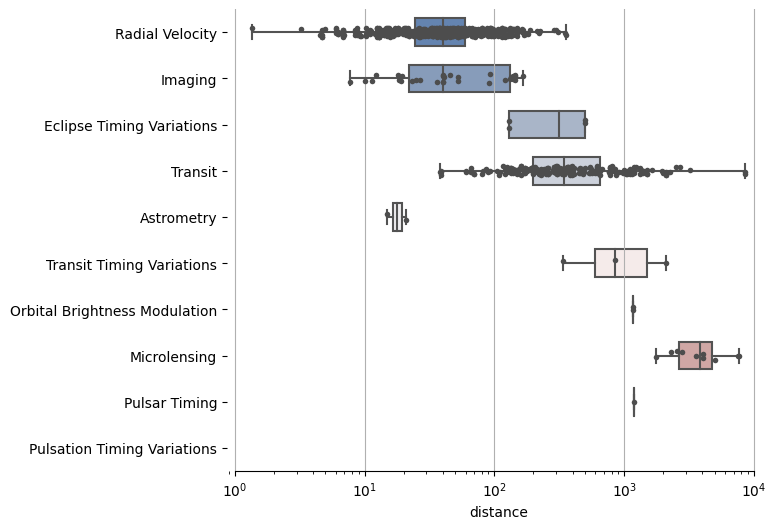

In [5]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("log")

# Load the example planets dataset
planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="distance", y="method", data=planets,
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="distance", y="method", data=planets,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

In [130]:
hot_jupiters = hj[[
    'pl_name', 'hostname', 'default_flag', 'sy_snum', 'sy_pnum',
       'discoverymethod', 'disc_year', 'disc_facility', 'soltype',
       'pl_controv_flag', 'pl_refname', 'pl_orbper', 'pl_orbpererr1',
       'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1',
       'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1',
       'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2',
       'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2',
       'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2',
       'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1',
       'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol', 'pl_insolerr1',
       'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2',
       'pl_eqtlim'
]]

hot_jupiters = hot_jupiters.drop_duplicates(subset=['pl_name'])

print('Confirmed Hot Jupiters:', hot_jupiters.shape[0])

Confirmed Hot Jupiters: 609


In [131]:
hj_stars = hj[[
    'hostname', 'sy_snum', 'sy_pnum', 'st_spectype', 'st_teff', 
    'st_mass', 'st_met', 'st_metratio', 'sy_dist'
]]

hj_stars = hj_stars.drop_duplicates(subset=['hostname'])

print('Confirmed Planetary Systems with Hot Jupiters:', hj_stars.shape[0])

Confirmed Planetary Systems with Hot Jupiters: 602


In [132]:
hj_per_year = hot_jupiters.groupby(['disc_year'])['pl_name'].count().reset_index()
hj_per_year.columns = ['year', 'planets_discovered']

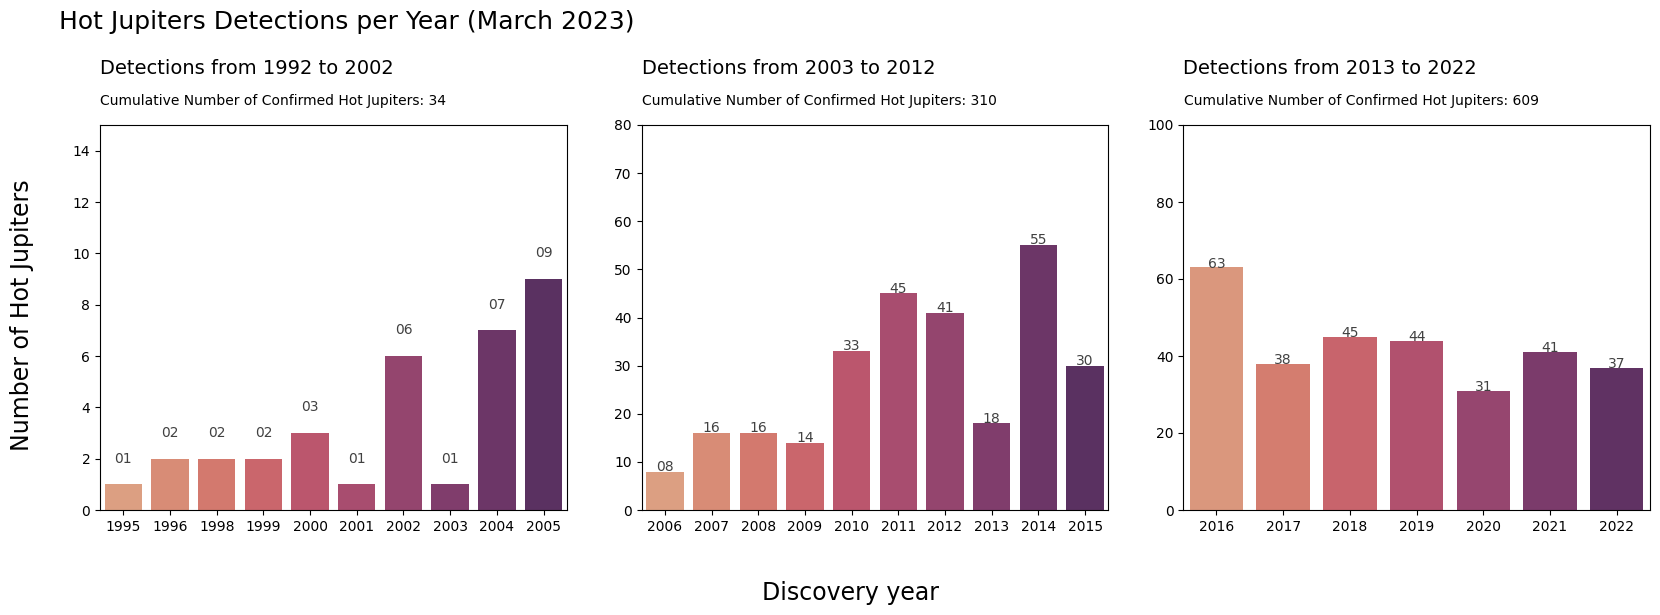

In [134]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
fig.subplots_adjust(wspace=0.16)

sns.barplot(ax=ax[0], data=hj_per_year[:10], x='year', y='planets_discovered',palette='flare')
sns.barplot(ax=ax[1], data=hj_per_year[10:20], x='year', y='planets_discovered',palette='flare')
sns.barplot(ax=ax[2], data=hj_per_year[20:30], x='year', y='planets_discovered',palette='flare')

fig.suptitle('Hot Jupiters Detections per Year (March 2023)', x=0.2485, y=1.11, size=18)
fig.supxlabel('Discovery year', y=-0.08, size=17)
fig.supylabel('Number of Hot Jupiters', x=0.08, size=17)

ax[0].set_title('Detections from 1992 to 2002', y=1.11, size=14, loc='left')
ax[1].set_title('Detections from 2003 to 2012', y=1.11, size=14, loc='left')
ax[2].set_title('Detections from 2013 to 2022', y=1.11, size=14, loc='left')

for i in range(3):
    ax[i].xaxis.label.set_visible(False)
    ax[i].yaxis.label.set_visible(False)
    
    for p in ax[i].patches:  
        text_y = 5 if i==1 else 1
        if i==2: text_y = 50
            
        ax[i].text(p.get_x() + p.get_width()/2, p.get_height()+1, f'{int(p.get_height()):02d}', 
                   ha='center', va='center', color='#414141')

ax[0].set_ylim(0, 15)
ax[1].set_ylim(0, 80)
ax[2].set_ylim(0, 100)

fig.text(0.125, 0.92, f'Cumulative Number of Confirmed Hot Jupiters: {hj_per_year.iloc[:10, 1].sum()}')
fig.text(0.396, 0.92, f'Cumulative Number of Confirmed Hot Jupiters: {hj_per_year.iloc[:20, 1].sum()}')
fig.text(0.667, 0.92, f'Cumulative Number of Confirmed Hot Jupiters: {hj_per_year.iloc[:30, 1].sum()}')

plt.show()

## eccentricity distribution

In [10]:
df_pl_ecc = hot_jupiters.copy()

planets_with_missing_ecc = df_pl_ecc['pl_orbeccen'].isna().sum()
planets_with_known_ecc = df_pl_ecc.shape[0] - planets_with_missing_ecc

df_pl_ecc.dropna(subset=['pl_orbeccen'], inplace=True)

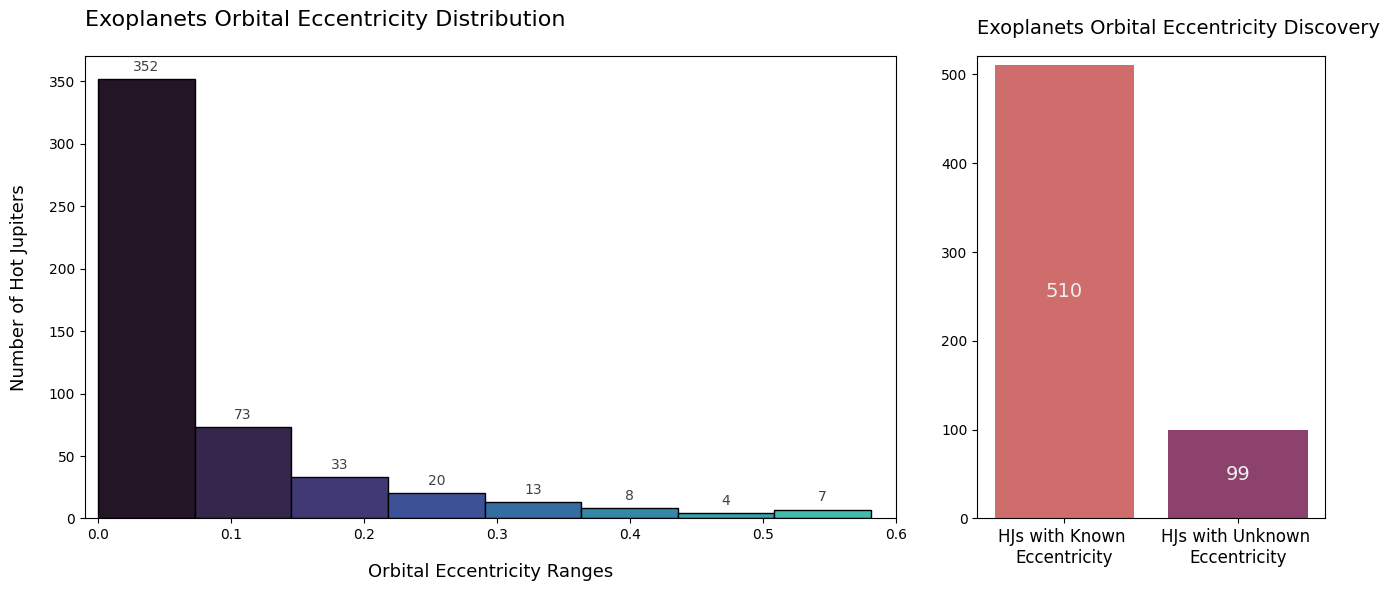

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [.70, .30]})
fig.subplots_adjust(wspace=0.14)

sns.histplot(ax=ax[0], data=df_pl_ecc, x='pl_orbeccen', bins=8)

ax[0].set_title('Exoplanets Orbital Eccentricity Distribution', loc='left', pad=22, size=16)

ax[0].set_xlabel('Orbital Eccentricity Ranges', labelpad=15, size=13)
ax[0].set_ylabel('Number of Hot Jupiters', labelpad=15, size=13)
ax[0].set_xlim(-0.01, 0.6)
ax[0].set_xticks(np.arange(0, 0.7, 0.1))
ax[0].set_ylim(0, 370)

for p in ax[0].patches:
    ax[0].annotate(
        p.get_height(), (p.get_x()+p.get_width()/2, p.get_height()+10), 
        ha='center', va='center', color='#414141'
    )
    
sns.barplot(
    ax=ax[1], x=['HJs with Known \nEccentricity', 'HJs with Unknown \nEccentricity'], 
    y=[planets_with_known_ecc, planets_with_missing_ecc], palette='flare'
)

ax[1].set_title('Exoplanets Orbital Eccentricity Discovery', loc='left', pad=16, size=14)
ax[1].tick_params(axis='x', labelsize=12)
ax[1].set_ylim(0, 520)

for p in ax[1].patches:
    ax[1].annotate(
        f'{int(p.get_height()):d}', (p.get_x()+p.get_width()/2, p.get_height()/2), 
        ha='center', va='center', color='#efefef', size=14
    )
    
for bin_,i in zip(ax[0].patches, sns.color_palette('mako', 10)):
    bin_.set_facecolor(i)

plt.show()

## get all planets

In [35]:
df = pd.read_csv('planets.csv', skiprows=96,delimiter=',')

In [36]:
df.columns

Index(['pl_name', 'hostname', 'default_flag', 'sy_snum', 'sy_pnum',
       'discoverymethod', 'disc_year', 'disc_facility', 'soltype',
       'pl_controv_flag', 'pl_refname', 'pl_orbper', 'pl_orbpererr1',
       'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1',
       'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1',
       'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2',
       'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2',
       'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2',
       'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1',
       'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol', 'pl_insolerr1',
       'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2',
       'pl_eqtlim', 'ttv_flag', 'st_refname', 'st_spectype', 'st_teff',
       'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1',
       'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2

In [39]:
G=6.67*10**-8  #grav in cgs
kboltz=1.38*10**-16
mu=2.5
mh=1.67*10**-24
massjup=1.89*10**30
radjup=7.140*10**9
radsun=6.96*10**10
AU=1.496*10**13.  #cm

masssat=5.683*10**29. #g
radsat=5.82*10**9. #cm
denssat=masssat/((4.*np.pi/3.)*radsat**3.)

j2n_mass=18.5346158

In [41]:
import scipy
from scipy.stats import norm

def wolfgang_mr(R,c,g):
    Re=6.371*10**8.
    rr=R/Re
    
    return c*rr**g

def wolfgang_mr_f1(R,c,g,s,a):
    Re=6.371*10**8.
    rr=R/Re
    rs=rr-1.
    
    sig=s
    mu=c*rr**g
    
    s = norm.pdf(rr,mu,sig)
    t = norm.interval(a, loc=mu, scale=sig)
    return t

def wolfgang_mr_f2(R,c,g,s,b,a):
    Re=6.371*10**8.
    rr=R/Re
    rs=rr-1.
    
    sig=np.sqrt(s**2.+b*rs)
    mu=c*rr**g
    
    s = norm.pdf(rr,mu,sig)
    t = norm.interval(a, loc=mu, scale=sig)
    return t

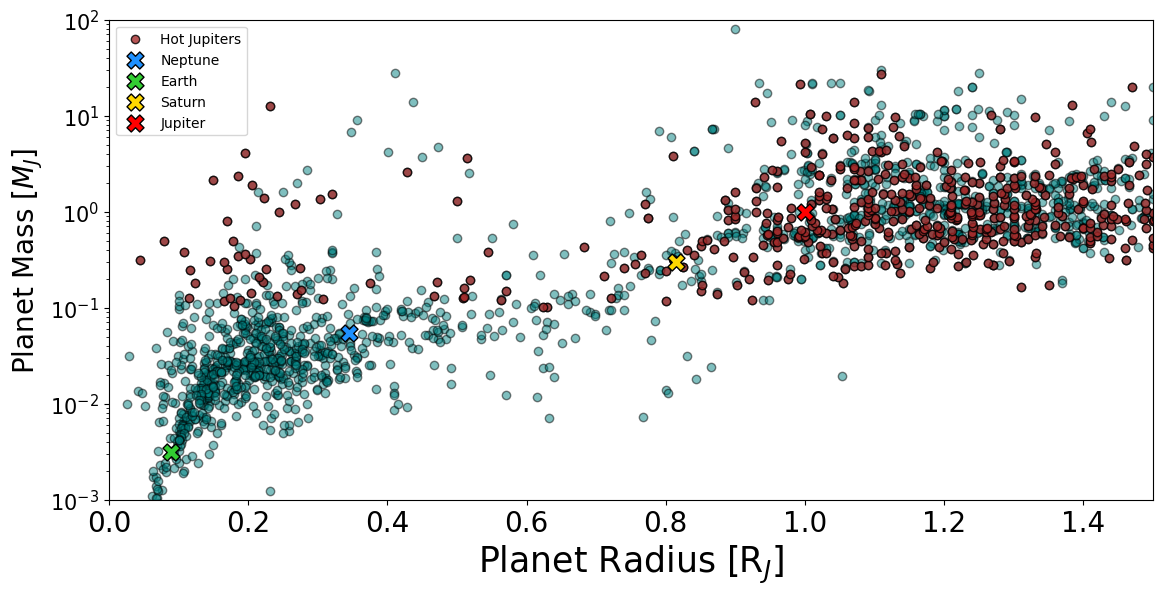

In [158]:
plt.figure(figsize=(12,6))
plt.gcf().subplots_adjust(bottom=0.18,top=0.98,left=0.12,right=0.99)

radnept=2.46*10**9. 
massnept=1.0241*10**29.

radearth=6.371*10**8.
massearth=5.97*10**27.

raderr1=df['pl_radjerr1']
raderr2=df['pl_radjerr2']
maserr1=df['pl_bmassjerr1']
maserr2=df['pl_bmassjerr2']

# plt.fill_between(0,1.5,0.1,11, alpha=0.1)


# plt.fill_between([1.0*radearth/radjup,1.8*radearth/radjup],0,100,color='green',alpha=0.1)
# plt.fill_between([1.8*radearth/radjup,3.0*radearth/radjup],0,100,color='royalblue',alpha=0.1)
# plt.fill_between([0.1*radjup,100*radjup],0,100,color='red',alpha=0.1)


# plt.errorbar(df['pl_radj'],df['pl_bmassj'],
#              xerr=raderr1,
#              yerr=maserr1,
#             fmt='none',alpha=0.12,color='black')
plt.scatter(df['pl_radj'],df['pl_bmassj'],color='teal',edgecolor='black',alpha=0.5)
plt.scatter(hot_jupiters['pl_radj'],hot_jupiters['pl_bmassj'],color='brown',edgecolor='black',alpha=0.8, label='Hot Jupiters')

plt.scatter(radnept/radjup,massnept/massjup,facecolor='dodgerblue',s=150,edgecolor='black',zorder=10, label='Neptune',marker='X')
plt.scatter(radearth/radjup,massearth/massjup,facecolor='limegreen',s=150,edgecolor='black',zorder=10, label='Earth',marker='X')
plt.scatter(radsat/radjup,masssat/massjup,facecolor='gold',s=150,edgecolor='black',zorder=10, label='Saturn',marker='X')
plt.scatter(1.0,1.0,facecolor='red',edgecolor='black',s=150,zorder=10, label='Jupiter',marker='X')


plt.xlabel('Planet Radius [R$_{J}$]',fontsize=25)
plt.xticks(fontsize=20)

plt.ylabel('Planet Mass [$M_{J}$]',fontsize=20)
plt.yticks(fontsize=15)

plt.yscale('log')
#plt.yscale('log')
#plt.ylim(0.001,150)
plt.xlim(0,1.5)
plt.ylim(0.001,100)

# plt.figtext(0.195,0.97,'Super-Earths',color='green',weight='bold',fontsize=20,rotation='vertical',ha='center',va='top')
# plt.figtext(0.245,0.97,'Mini-Neptunes',color='royalblue',weight='bold',fontsize=20,rotation='vertical',ha='center',va='top')


# plt.figtext(0.594,0.8,'Saturn',color='goldenrod',weight='bold',fontsize=16,rotation='vertical',ha='center',va='top')
# plt.figtext(0.705,0.85,'Jupiter',color='black',weight='bold',fontsize=16,rotation='vertical',ha='center',va='top')

# plt.figtext(0.35, 0.85,'Neptune',color='royalblue',weight='bold',fontsize=16,rotation='vertical',ha='center',va='top')
# plt.figtext(0.3,0.65,'Earth',color='green',weight='bold',fontsize=16,rotation='vertical',ha='center',va='top')


#plt.figtext(0.16,0.88,'Transits',color='blue',weight='bold',fontsize=25)
#plt.figtext(0.135,0.925,'Radial Velocity',color=rvc,weight='bold',fontsize=25)

#### R<1.6
R_16=np.linspace(0,1.6,100)*radearth
M_16=wolfgang_mr(R_16,1.4,2.3)*massearth
#ll,ul=wolfgang_mr_f1(R_4,2.6,1.3,0.0)
#plt.plot(R_16/radjup,M_16/massjup,color='black',linewidth=5.0,linestyle='--')

#### R<4
R_4=np.linspace(0.0,4.0,100)*radearth
M_4=wolfgang_mr(R_4,1.6,1.8)*massearth
ll4,ul4=wolfgang_mr_f2(R_4,2.6,1.3,2.1,1.5,0.68)
# plt.plot(R_4/radjup,M_4/massjup,color='black',linewidth=5.0,linestyle='--')
#plt.fill_between(R_4/radjup,ll4*(massearth/massjup),ul4*(massearth/massjup),color='darkgoldenrod',alpha=0.5)

#### R<8
R_8=np.linspace(0.0,8.0,100)*radearth
M_8=wolfgang_mr(R_8,1.6,1.8)*massearth
ll8,ul8=wolfgang_mr_f1(R_8,1.6,1.8,2.9,0.68)
# plt.plot(R_8/radjup,M_8/massjup,color='black',linewidth=5.0,linestyle='--')
# plt.fill_between(R_8/radjup,ll8*(massearth/massjup),ul8*(massearth/massjup),color='darkgoldenrod',alpha=0.5)

plt.legend()
plt.show()

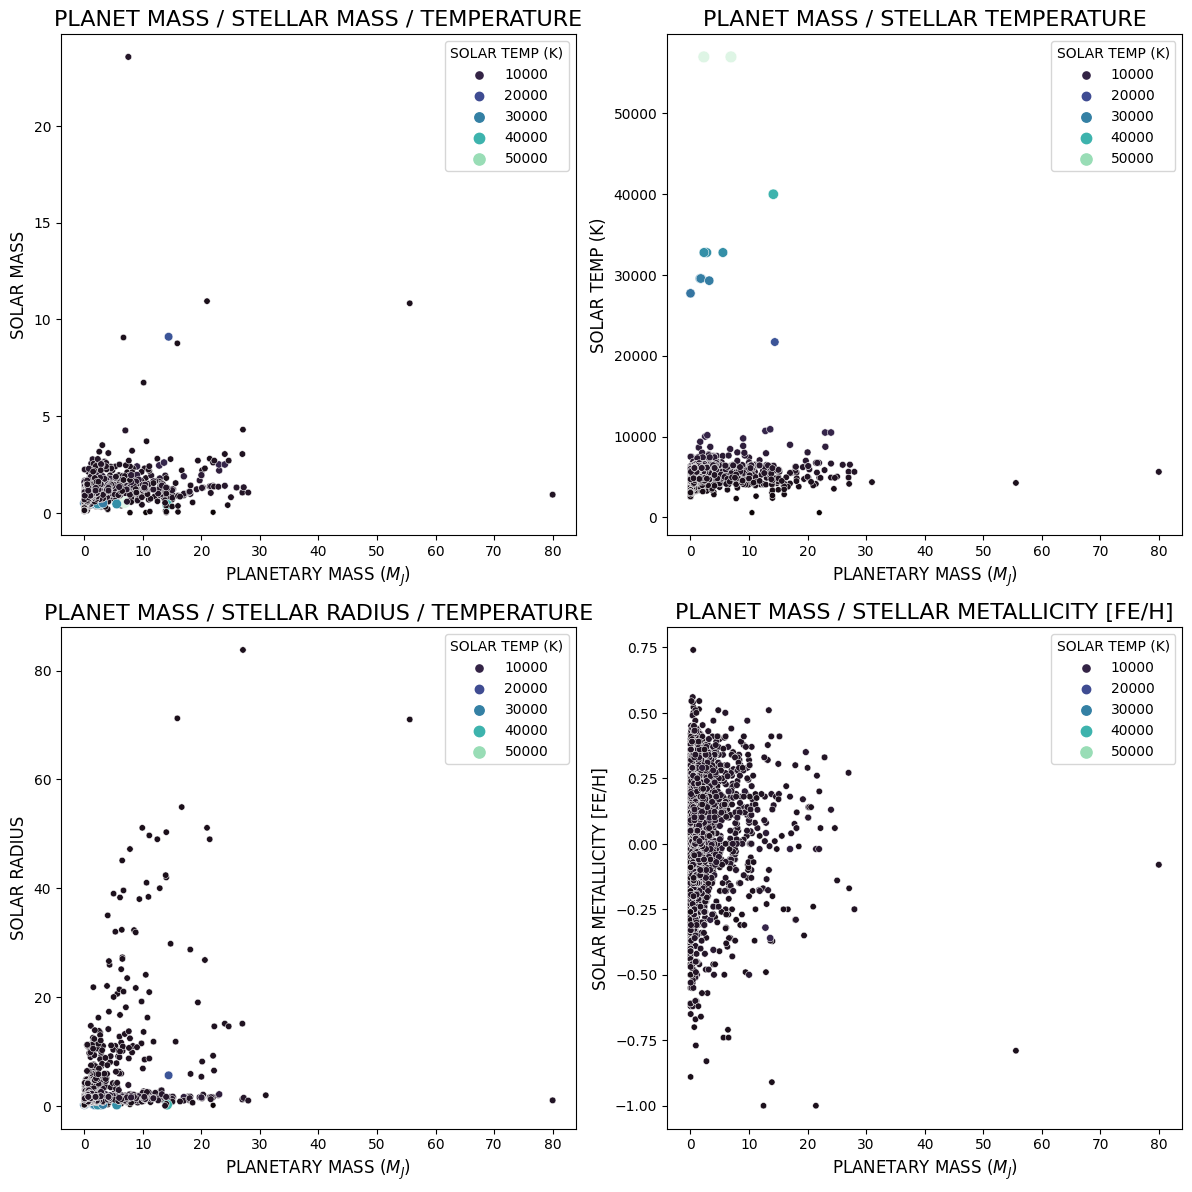

In [128]:
plt.figure(figsize=(12,12))

plt.subplot(221)
sns.scatterplot(data=df, x='pl_bmassj', y='st_mass', hue='st_teff', size='st_teff', palette='mako')
plt.title('PLANET MASS / STELLAR MASS / TEMPERATURE', fontsize=16)
plt.xlabel('PLANETARY MASS ($M_J$)', fontsize=12)
plt.ylabel('SOLAR MASS', fontsize=12)
plt.legend(loc='best', title='SOLAR TEMP (K)')#, title='SOLAR AGE (bya)')
plt.tight_layout(pad=1)

plt.subplot(222)
sns.scatterplot(data=df, x='pl_bmassj', y='st_teff', hue='st_teff', size='st_teff', palette='mako')
plt.title('PLANET MASS / STELLAR TEMPERATURE', fontsize=16)
plt.xlabel('PLANETARY MASS ($M_J$)', fontsize=12)
plt.ylabel('SOLAR TEMP (K)', fontsize=12)
plt.legend(loc='best', title='SOLAR TEMP (K)')#, title='SOLAR AGE (bya)')
plt.tight_layout(pad=1)

plt.subplot(223)
sns.scatterplot(data=df, x='pl_bmassj', y='st_rad', hue='st_teff', size='st_teff', palette='mako')
plt.title('PLANET MASS / STELLAR RADIUS / TEMPERATURE', fontsize=16)
plt.xlabel('PLANETARY MASS ($M_J$)', fontsize=12)
plt.ylabel('SOLAR RADIUS', fontsize=12)
plt.legend(loc='best', title='SOLAR TEMP (K)')#, title='SOLAR AGE (bya)')
plt.tight_layout(pad=1)

plt.subplot(224)
sns.scatterplot(data=df, x='pl_bmassj', y='st_met', hue='st_teff', size='st_teff', palette='mako')
plt.title('PLANET MASS / STELLAR METALLICITY [FE/H]', fontsize=16)
plt.xlabel('PLANETARY MASS ($M_J$)', fontsize=12)
plt.ylabel('SOLAR METALLICITY [FE/H]', fontsize=12)
plt.legend(loc='best', title='SOLAR TEMP (K)')#, title='SOLAR AGE (bya)')
plt.tight_layout(pad=1)

plt.show();